# Homework 5
## Problem 1

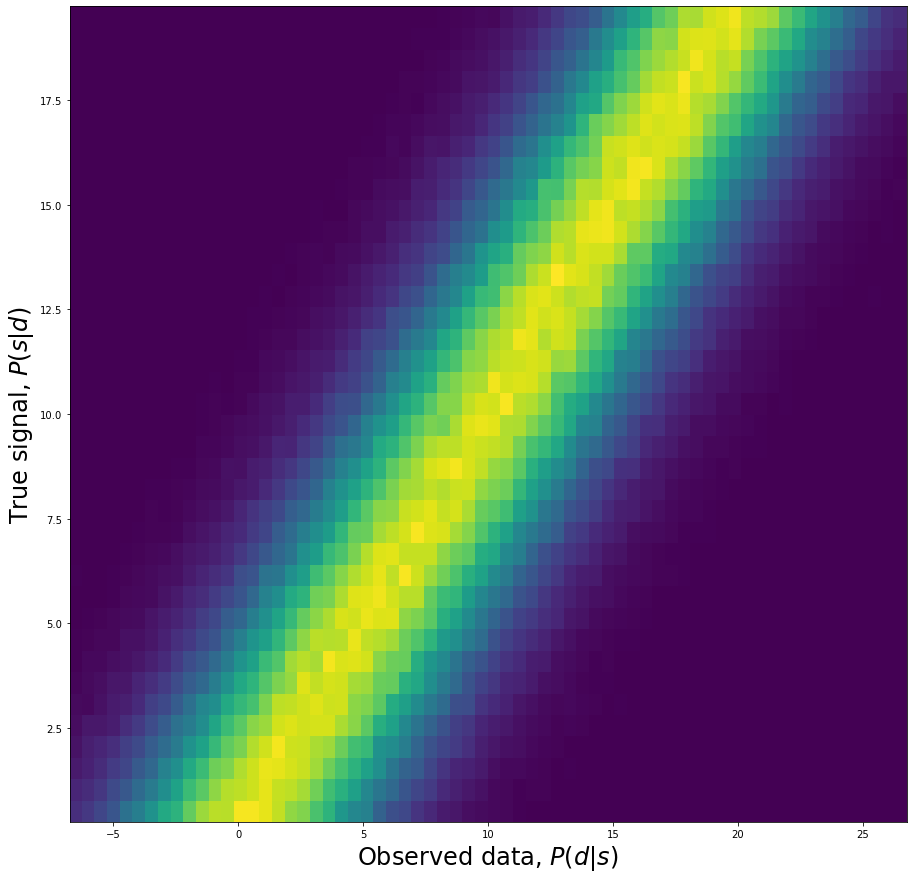

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

bkgd = stats.norm.rvs(scale=3.5, size=1000000)
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

plt.figure(figsize=(15,15))
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

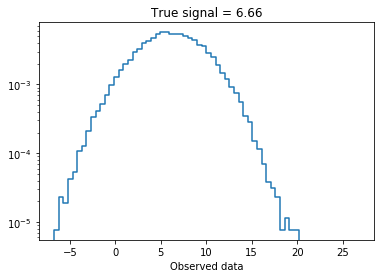

In [3]:
# Problem 1b - plot of P(d|s)

# select true signal
true = signal[500001]

# Get probability from 2d hist
n = math.floor(true/0.5)  # y-bin in which true value lies
H = Psd.T  # common y-ranges
y11 = H[n-1]
    
# Probability of data given signal
plt.step(datacenters, y11)
title = 'True signal = ' + str(round(true, 2))
plt.title(title)
plt.xlabel('Observed data')
plt.yscale('log')
plt.show()

P(d|s) is a conditional probability of getting data d given signal s. Equal to P(d$\cup$s)/P(s). The plot describes the probability of getting a range in which the data lies for a given true signal.

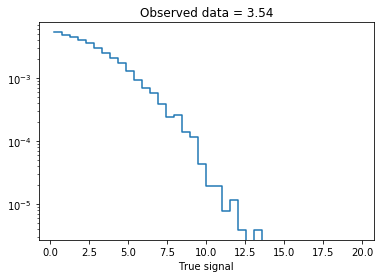

In [4]:
# Problem 1c - plot of P(s|d)

# select data value
observe = data[500001]

# Get probability from 2d Hist
n = math.floor(true/0.5)  # y-bin in which true value lies
y12 = Psd[n-1]

# Probability of signal given data
plt.step(signalcenters, y12)
title = 'Observed data = ' + str(round(observe, 2))
plt.title(title)
plt.xlabel('True signal')
plt.yscale('log')
plt.show()

Here the graph is showing the probability of getting a signal in a range given the data. This means that with the simulated data, we can predict the value of the signal to be within a range.

## Problem 2

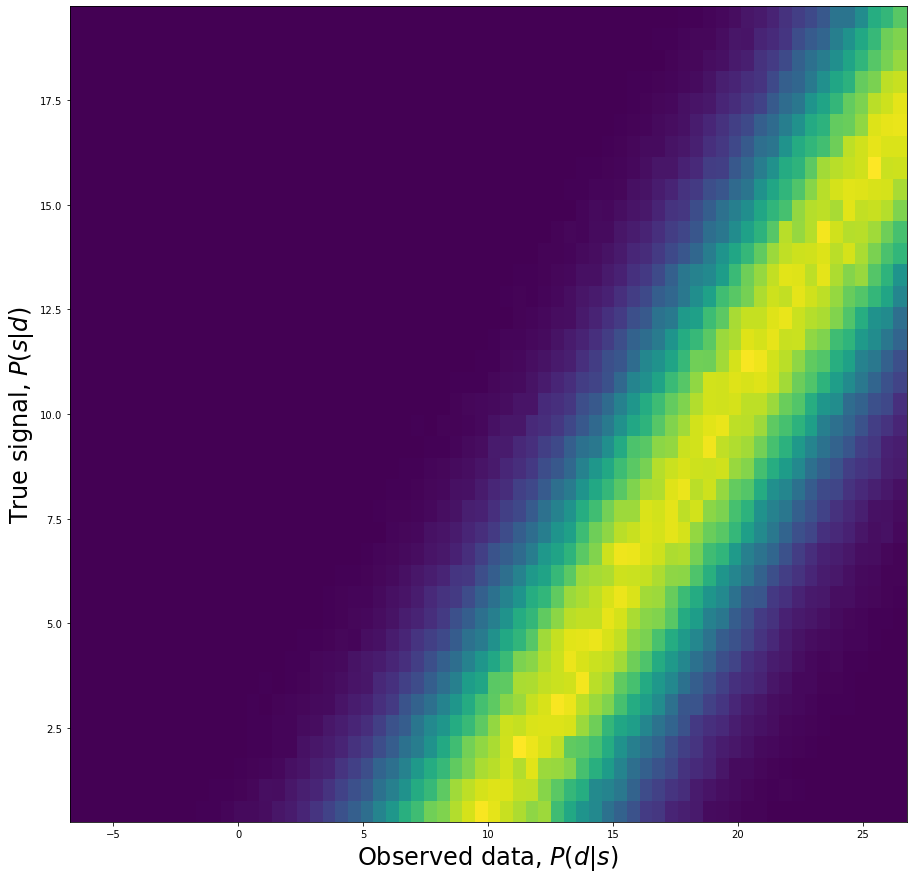

In [5]:
bkgd2 = stats.norm.rvs(loc=9.5, scale=3.5, size=1000000)  # non-zero mean
signal2 = stats.uniform.rvs(loc=0, scale=20, size=1000000)  

data2 = bkgd2 + signal2

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp, temp2= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

plt.figure(figsize=(15,15))
datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd2.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

We see that the background has shifted the observed data probabilities to higher values.

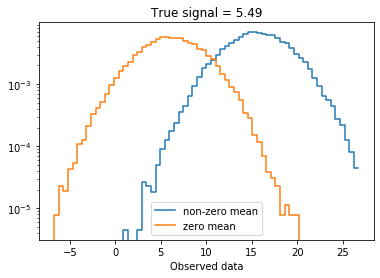

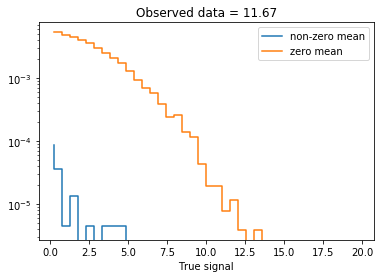

In [6]:
# P(d|s) ######################################

# select true signal
true2 = signal2[500001]

# Get probability from 2d hist
n = math.floor(true/0.5)  # y-bin in which true value lies
H = Psd2.T  # common y-ranges
y2 = H[n-1]
    
# Probability of data given signal
plt.step(datacenters2, y2)
plt.step(datacenters, y11)
title = 'True signal = ' + str(round(true2, 2))
plt.title(title)
plt.xlabel('Observed data')
plt.yscale('log')
plt.legend(['non-zero mean','zero mean'])
plt.show()

# P(s|d) ######################################

# select data value
observe2 = data2[500001]

# Get probability from 2d Hist
n = math.floor(true/0.5)  # y-bin in which true value lies
y2 = Psd2[n-1]

# Probability of signal given data
plt.step(signalcenters2, y2)
plt.step(signalcenters, y12)
title = 'Observed data = ' + str(round(observe2, 2))
plt.title(title)
plt.xlabel('True signal')
plt.yscale('log')
plt.legend(['non-zero mean','zero mean'])
plt.show()

For P(d|s), the observed signal is the true signal + the mean of the background. These plots are not centered because adjusting the mean has changed the observed data at which the given true signal's probabilities peak.

For P(s|d), the addition of the mean of the background has shifted the range of probabilities of getting a signal. The probability of getting a true signal at higher observed values has decreased significantly because the mean is several standard deviations greater.  